# INPUTS

In [1]:
MODEL_NAME = 'NB'

# LIBS

In [2]:
# custom imports
from constants import DAYS
from functions import best_features_set

# scipy imports
from scipy.stats import ttest_ind

# standard Python imports
import pandas as pd

# FILES

In [3]:
X_train = pd.read_csv(f'../dataset/X_train.csv', index_col=0)
y_train = pd.read_csv(f'../dataset/y_train.csv', index_col=0)
X_test = pd.read_csv(f'../dataset/X_test.csv', index_col=0)
y_test = pd.read_csv(f'../dataset/y_test.csv', index_col=0)

# DATA

In [4]:
X = pd.concat([X_train, X_test],axis=0)
y = pd.concat([y_train, y_test],axis=0)

data = pd.concat([X, y], axis=1)

In [5]:
data['Advanced Staging'] = data['Advanced Staging'].apply(lambda x: 1 if x == True else (0 if x == False else None))

# FEATURES

In [6]:
features = best_features_set(MODEL_NAME)

# Mean ± Standard Deviation and Statistical Difference 

In [7]:
# Calculate descriptive statistics for all features
all_stats = data.drop(columns=[f'Death ({DAYS} days)']).describe()

# Calculate descriptive statistics for deaths
death_stats = data[data[f'Death ({DAYS} days)'] == 1].drop(columns=[f'Death ({DAYS} days)']).describe()

# Calculate descriptive statistics for survivors
survival_stats = data[data[f'Death ({DAYS} days)'] == 0].drop(columns=[f'Death ({DAYS} days)']).describe()

# Calculate Student's t-test to compare deaths with survivors
p_values = {}
for column in data.columns[:-1]:  # Exclude the last column ('Outcome') from analysis
    t_stat, p_value = ttest_ind(data[data[f'Death ({DAYS} days)'] == 1][column].dropna(), 
                                data[data[f'Death ({DAYS} days)'] == 0][column].dropna())
    p_values[column] = p_value

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'All': all_stats.loc['mean'].round(2).astype(str) + " ± " + all_stats.loc['std'].round(2).astype(str),
    'Deaths': death_stats.loc['mean'].round(2).astype(str) + " ± " + death_stats.loc['std'].round(2).astype(str),
    'Survivors': survival_stats.loc['mean'].round(2).astype(str) + " ± " + survival_stats.loc['std'].round(2).astype(str),
    'Statistical Difference (p-value)': p_values
})

# Print the DataFrame
result_df.loc[features,:]
result_df.sort_values('Statistical Difference (p-value)')

,All,Deaths,Survivors,Statistical Difference (p-value)
KPS,74.15 ± 16.47,62.22 ± 17.44,78.24 ± 14.0,3.905319e-09
Hemoglobin,10.69 ± 1.93,9.43 ± 2.06,11.15 ± 1.67,5.700732e-08
KATZ,0.83 ± 1.46,1.74 ± 1.94,0.5 ± 1.08,2.334078e-07
MNA-SF,8.53 ± 2.95,6.77 ± 2.14,9.17 ± 2.95,8.018385e-07
Leukocyte,7319.49 ± 3652.4,9491.49 ± 4280.99,6540.23 ± 3059.49,9.851191e-07
Advanced Staging,0.73 ± 0.45,0.96 ± 0.2,0.65 ± 0.48,3.162078e-05
IPAQ-SF,3.33 ± 0.82,3.66 ± 0.56,3.22 ± 0.86,1.236245e-03
Platelet,288401.13 ± 126885.65,334521.74 ± 164523.79,272206.11 ± 106818.52,3.882988e-03
MMSE,21.07 ± 4.96,19.47 ± 5.83,21.64 ± 4.49,9.523988e-03
Polypharmacy,2.72 ± 2.26,3.36 ± 2.51,2.49 ± 2.13,2.278975e-02


# KPS

In [8]:
percentual = data['KPS'].value_counts(normalize=True).sort_index() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

KPS
30.0      0.57
40.0      3.41
50.0     14.20
60.0      7.95
70.0     22.16
80.0     20.45
90.0     23.86
100.0     7.39
Name: proportion, dtype: float64


In [9]:
data['KPS'] = data['KPS'].apply(lambda x: True if x >= 70 else False)
data.groupby('KPS')['Death (180 days)'].mean() * 100

KPS
False    54.166667
True     16.153846
Name: Death (180 days), dtype: float64

In [10]:
percentual = data['KPS'].value_counts(normalize=True).sort_index() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

KPS
False    26.97
True     73.03
Name: proportion, dtype: float64


# KATZ

In [11]:
percentual = data['KATZ'].value_counts(normalize=True).sort_index() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

KATZ
0.0    62.92
1.0    19.66
2.0     3.93
3.0     5.06
4.0     3.93
5.0     2.25
6.0     2.25
Name: proportion, dtype: float64


In [12]:
data['KATZ'] = data['KATZ'].apply(lambda x: True if x > 0 else False)
data.groupby('KATZ').mean()['Death (180 days)'] * 100

KATZ
False    15.178571
True     45.454545
Name: Death (180 days), dtype: float64

# MNA-SF	

In [13]:
def categorize_mna_sf(x):
    if x >= 12:
        return 'NUTRIDO'
    elif x >= 8:
        return 'RISCO DESNUTRICAO'
    else:
        return 'DESNUTRIDO'

data['MNA-SF'] = data['MNA-SF'].apply(categorize_mna_sf)

In [14]:
percentual = data['MNA-SF'].value_counts(normalize=True).sort_index() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

MNA-SF
DESNUTRIDO           43.82
NUTRIDO              20.22
RISCO DESNUTRICAO    35.96
Name: proportion, dtype: float64


In [15]:
percentual = data.groupby('MNA-SF').mean()['Death (180 days)'] * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

MNA-SF
DESNUTRIDO           42.31
NUTRIDO               2.78
RISCO DESNUTRICAO    20.31
Name: Death (180 days), dtype: float64


# Hemoglobin

In [16]:
data['Hb']=data['Hemoglobin'].apply(lambda x: x < 11.15)
percentual = data.groupby('Hb')['Death (180 days)'].mean() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

Hb
False    16.00
True     33.98
Name: Death (180 days), dtype: float64


# Leukocyte

In [17]:
data['Lkc']=data['Leukocyte'].apply(lambda x: x < 6540.23)
percentual = data.groupby('Lkc')['Death (180 days)'].mean() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

Lkc
False    41.18
True     12.90
Name: Death (180 days), dtype: float64


# Staging

In [18]:
percentual = data['Advanced Staging'].value_counts(normalize=True).sort_index() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

Advanced Staging
0    26.97
1    73.03
Name: proportion, dtype: float64


In [19]:
percentual = data.groupby('Advanced Staging')['Death (180 days)'].mean() * 100
percentual = percentual.round(2)  # Arredondar para duas casas decimais
print(percentual)

Advanced Staging
0     4.17
1    34.62
Name: Death (180 days), dtype: float64


# KPS

In [20]:
threshold = data['KPS'].median()
kps = 'KPS <=' + str(threshold)
data[kps] = data['KPS'].apply(lambda x: x <= threshold)
grouped_data = data.loc[:, [kps, 'Death (180 days)']].groupby(kps).agg(['mean', 'count'])
print(grouped_data)

          Death (180 days)      
                      mean count
KPS <=1.0                       
True              0.264045   178


# MNA-SF

In [21]:
threshold = data['MNA-SF'].median()
mna = 'MNA-SF <=' + str(threshold)
data[mna] = data['MNA-SF'].apply(lambda x: x <= threshold)
grouped_data = data.loc[:, [mna, 'Death (180 days)']].groupby(mna).agg(['mean', 'count'])
print(grouped_data)

TypeError: could not convert string to float: 'RISCO DESNUTRICAO'

# Hemoglobin

In [22]:
threshold = data['Hemoglobin'].median()
hemoglobin = 'Hb <=' + str(threshold)
data[hemoglobin] = data['Hemoglobin'].apply(lambda x: x <= threshold)
grouped_data = data.loc[:, [hemoglobin, 'Death (180 days)']].groupby(hemoglobin).agg(['mean', 'count'])
print(grouped_data)

          Death (180 days)      
                      mean count
Hb <=10.9                       
False             0.158537    82
True              0.354167    96


# Staging

In [23]:
threshold = data['Staging'].median()
staging = 'Staging <=' + str(threshold)
data[staging] = data['Staging'].apply(lambda x: x <= threshold)
grouped_data = data.loc[:, [staging, 'Death (180 days)']].groupby(staging).agg(['mean', 'count'])
print(grouped_data)

KeyError: 'Staging'

In [24]:
import numpy as np
df = data[data[mna] & data[hemoglobin]]
print(f'Chance de óbito de {np.mean(df.loc[:,"Death (180 days)"])}, ocorreu em {len(df)} pacientes')

NameError: name 'mna' is not defined

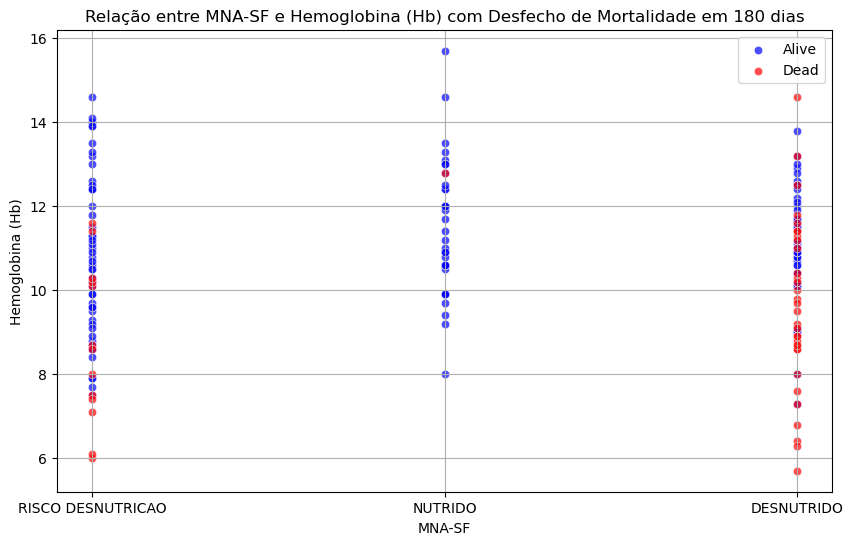

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Plotando o gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MNA-SF', y='Hemoglobin', data=data_alive, label='Alive', color='blue', alpha=0.7)
sns.scatterplot(x='MNA-SF', y='Hemoglobin', data=data_dead, label='Dead', color='red', alpha=0.7)

# Definindo título e rótulos dos eixos
plt.title('Relação entre MNA-SF e Hemoglobina (Hb) com Desfecho de Mortalidade em 180 dias')
plt.xlabel('MNA-SF')
plt.ylabel('Hemoglobina (Hb)')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


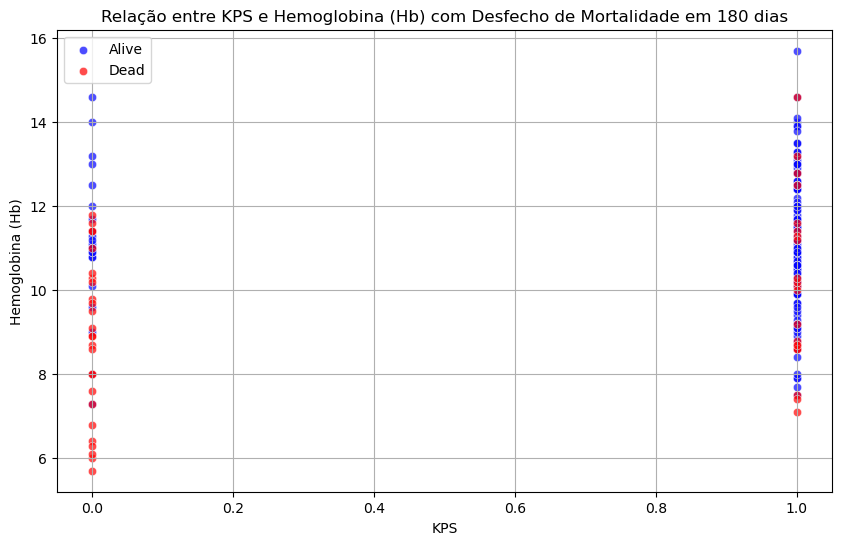

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Plotando o gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KPS', y='Hemoglobin', data=data_alive, label='Alive', color='blue', alpha=0.7)
sns.scatterplot(x='KPS', y='Hemoglobin', data=data_dead, label='Dead', color='red', alpha=0.7)

# Definindo título e rótulos dos eixos
plt.title('Relação entre KPS e Hemoglobina (Hb) com Desfecho de Mortalidade em 180 dias')
plt.xlabel('KPS')
plt.ylabel('Hemoglobina (Hb)')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

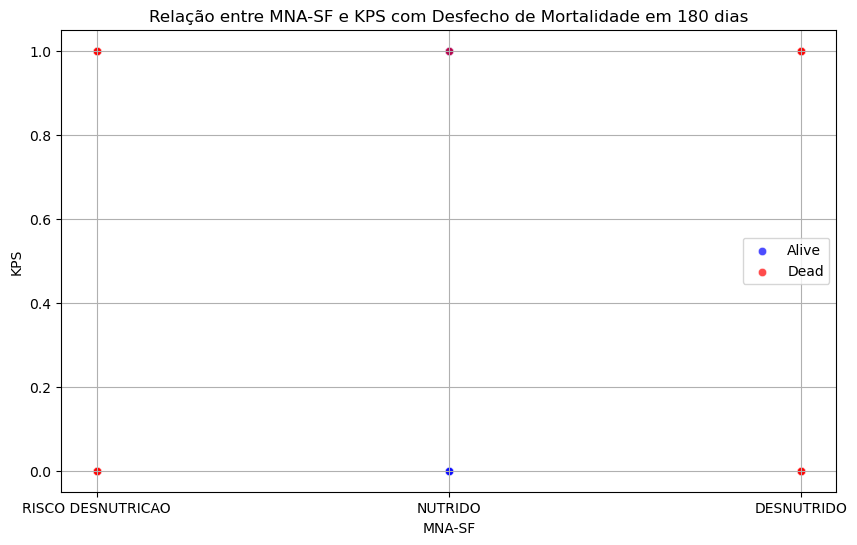

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Plotando o gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MNA-SF', y='KPS', data=data_alive, label='Alive', color='blue', alpha=0.7)
sns.scatterplot(x='MNA-SF', y='KPS', data=data_dead, label='Dead', color='red', alpha=0.7)

# Definindo título e rótulos dos eixos
plt.title('Relação entre MNA-SF e KPS com Desfecho de Mortalidade em 180 dias')
plt.xlabel('MNA-SF')
plt.ylabel('KPS')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

/tmp/ipykernel_12137/3683028525.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='MNA-SF', y='KPS', data=data_alive, cmap="Blues", shade=True, label='Alive')


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

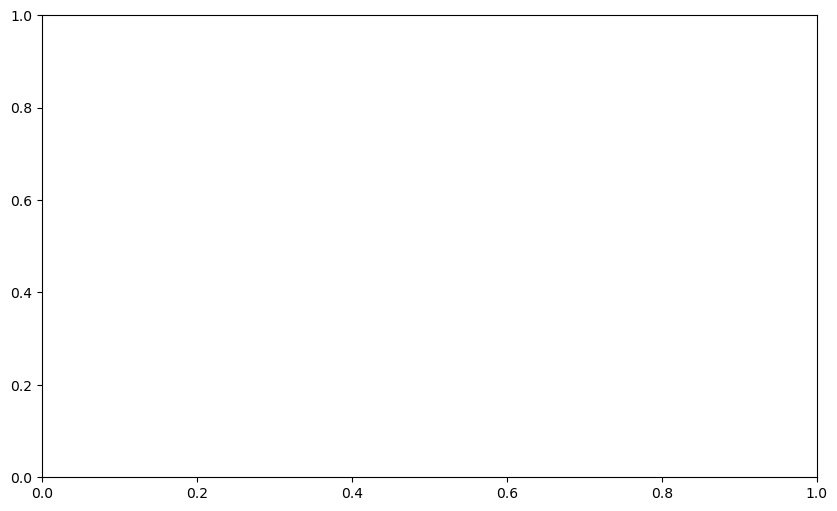

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Criando um gráfico de densidade com Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(x='MNA-SF', y='KPS', data=data_alive, cmap="Blues", shade=True, label='Alive')
sns.kdeplot(x='MNA-SF', y='KPS', data=data_dead, cmap="Reds", shade=True, label='Dead')

# Definindo título e rótulos dos eixos
plt.title('Relação entre MNA-SF e KPS com Desfecho de Mortalidade em 180 dias')
plt.xlabel('MNA-SF')
plt.ylabel('KPS')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


/tmp/ipykernel_12137/593017889.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='MNA-SF', y='Hemoglobin', data=data_alive, cmap="Blues", shade=True, label='Alive')


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

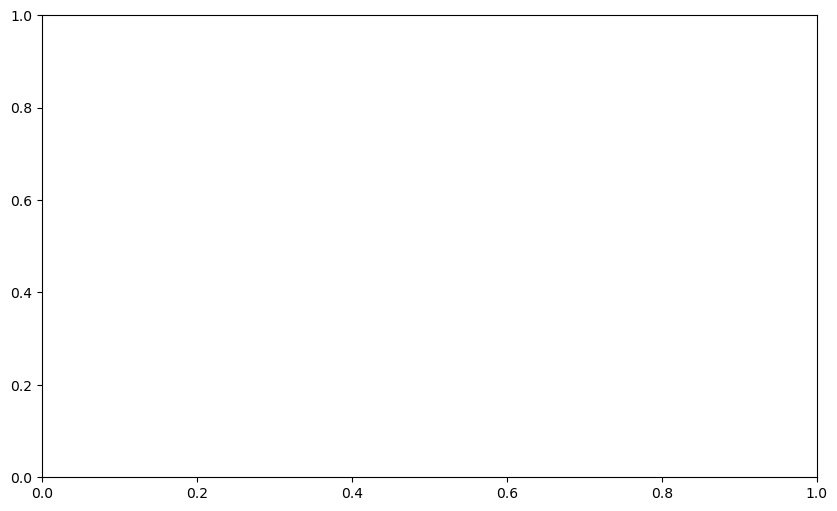

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Criando um gráfico de densidade com Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(x='MNA-SF', y='Hemoglobin', data=data_alive, cmap="Blues", shade=True, label='Alive')
sns.kdeplot(x='MNA-SF', y='Hemoglobin', data=data_dead, cmap="Reds", shade=True, label='Dead')

# Definindo título e rótulos dos eixos
plt.title('Relação entre MNA-SF e Hemoglobin com Desfecho de Mortalidade em 180 dias')
plt.xlabel('MNA-SF')
plt.ylabel('Hemoglobin')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

/tmp/ipykernel_12137/668909006.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Hemoglobin', y='Leukocyte', data=data_alive, cmap="Blues", shade=True, label='Alive')
/tmp/ipykernel_12137/668909006.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Hemoglobin', y='Leukocyte', data=data_dead, cmap="Reds", shade=True, label='Dead')


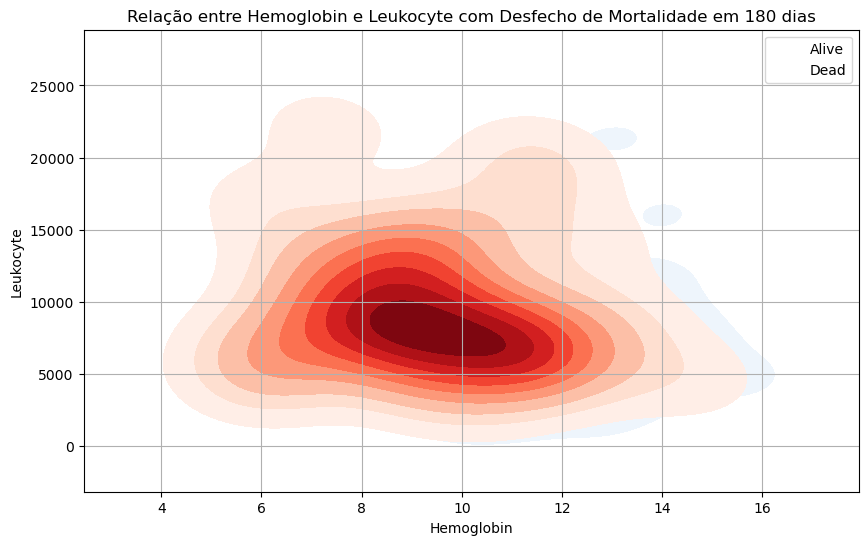

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'data' seja o nome do seu DataFrame

# Filtrando os dados para incluir apenas pacientes vivos e mortos
data_alive = data[data['Death (180 days)'] == False]
data_dead = data[data['Death (180 days)'] == True]

# Criando um gráfico de densidade com Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Hemoglobin', y='Leukocyte', data=data_alive, cmap="Blues", shade=True, label='Alive')
sns.kdeplot(x='Hemoglobin', y='Leukocyte', data=data_dead, cmap="Reds", shade=True, label='Dead')

# Definindo título e rótulos dos eixos
plt.title('Relação entre Hemoglobin e Leukocyte com Desfecho de Mortalidade em 180 dias')
plt.xlabel('Hemoglobin')
plt.ylabel('Leukocyte')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()